In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "C:/Wafer/"

x_train, y_train = readucr(root_url + "Wafer_TRAIN.tsv")
x_test, y_test = readucr(root_url + "Wafer_TEST.tsv")

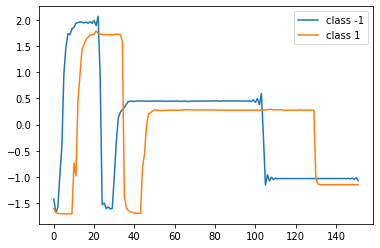

In [4]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [5]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [6]:
num_classes = len(np.unique(y_train))

In [7]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [8]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [9]:
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [10]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

Epoch 1/500
25/25 [==============================] - 3s 107ms/step - loss: 0.3465 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.5640 - val_sparse_categorical_accuracy: 0.9050
Epoch 2/500
25/25 [==============================] - 2s 92ms/step - loss: 0.2987 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.5283 - val_sparse_categorical_accuracy: 0.9050
Epoch 3/500
25/25 [==============================] - 2s 94ms/step - loss: 0.2919 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4659 - val_sparse_categorical_accuracy: 0.9050
Epoch 4/500
25/25 [==============================] - 2s 96ms/step - loss: 0.2815 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4367 - val_sparse_categorical_accuracy: 0.9050
Epoch 5/500
25/25 [==============================] - 3s 106ms/step - loss: 0.2708 - sparse_categorical_accuracy: 0.9025 - val_loss: 0.4362 - val_sparse_categorical_accuracy: 0.9050
Epoch 6/500
25/25 [==============================] - 3s 101ms/step - loss: 0.2725 - sparse_categor

In [11]:
model = keras.models.load_model("best_model.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

193/193 [==============================] - 3s 13ms/step - loss: 0.0028 - sparse_categorical_accuracy: 0.9992
Test accuracy 0.9991888403892517
Test loss 0.0027761629316955805


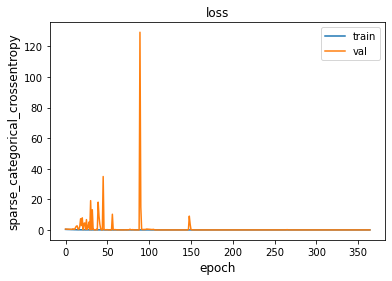

In [13]:
loss = "sparse_categorical_crossentropy"
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title("loss")
plt.ylabel(loss, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

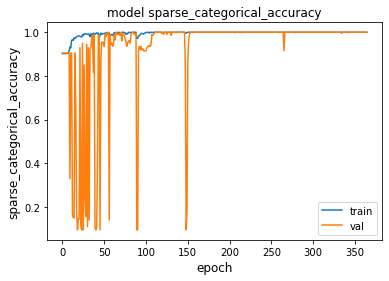

In [14]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()